In [1]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
from scripts import constants
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
performance_df = pd.read_csv(
    os.path.join(
        constants.DEFAULT_RESULTS_PATH,
        "performance_summary.csv",
    )
)

performance_df = performance_df.melt(
    id_vars=[
        "dataset",
        "method",
        "latent_size",
        "seed",
    ],
    value_vars=[
        "num_epochs",
        "silhouette",
        "calinski_harabasz",
        "davies_bouldin",
        "adjusted_random_index",
        "adjusted_mutual_info",
    ],
).rename(columns={"variable": "metric"})

In [3]:
performance_df

,dataset,method,latent_size,seed,metric,value
0,mcfarland_2020,cPCA,2,Deterministic,num_epochs,0.000000
1,mcfarland_2020,cPCA,10,Deterministic,num_epochs,0.000000
2,mcfarland_2020,cPCA,32,Deterministic,num_epochs,0.000000
3,mcfarland_2020,cPCA,64,Deterministic,num_epochs,0.000000
4,mcfarland_2020,PCPCA,2,Deterministic,num_epochs,0.000000
...,...,...,...,...,...,...
3067,fasolino_2021,mmd_contrastiveVI,64,123,adjusted_mutual_info,0.000075
3068,fasolino_2021,mmd_contrastiveVI,64,42,adjusted_mutual_info,0.171031
3069,fasolino_2021,mmd_contrastiveVI,64,789,adjusted_mutual_info,0.310213
3070,fasolino_2021,mmd_contrastiveVI,64,46,adjusted_mutual_info,0.106027


In [4]:
datasets = performance_df["dataset"].unique().tolist()
dataset_sparsity = {}

In [5]:
for dataset in tqdm(datasets):
    adata = sc.read_h5ad(
        os.path.join(
            constants.DEFAULT_DATA_PATH,
            f"{dataset}/preprocessed/adata_top_2000_genes.h5ad",
        )
    )
    sparsity = np.sum(adata.layers["count"] == 0) / (adata.X.shape[0] * adata.X.shape[1])
    dataset_sparsity[dataset] = sparsity

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.66s/it]


In [13]:
dataset_sparsity

{'mcfarland_2020': 0.8373022098515519,
 'zheng_2017': 0.9389038028001898,
 'haber_2017': 0.9190606786685662,
 'fasolino_2021': 0.8919549357455668}

In [6]:
metrics = performance_df["metric"].unique().tolist()

In [7]:
sns.set(font_scale=1)

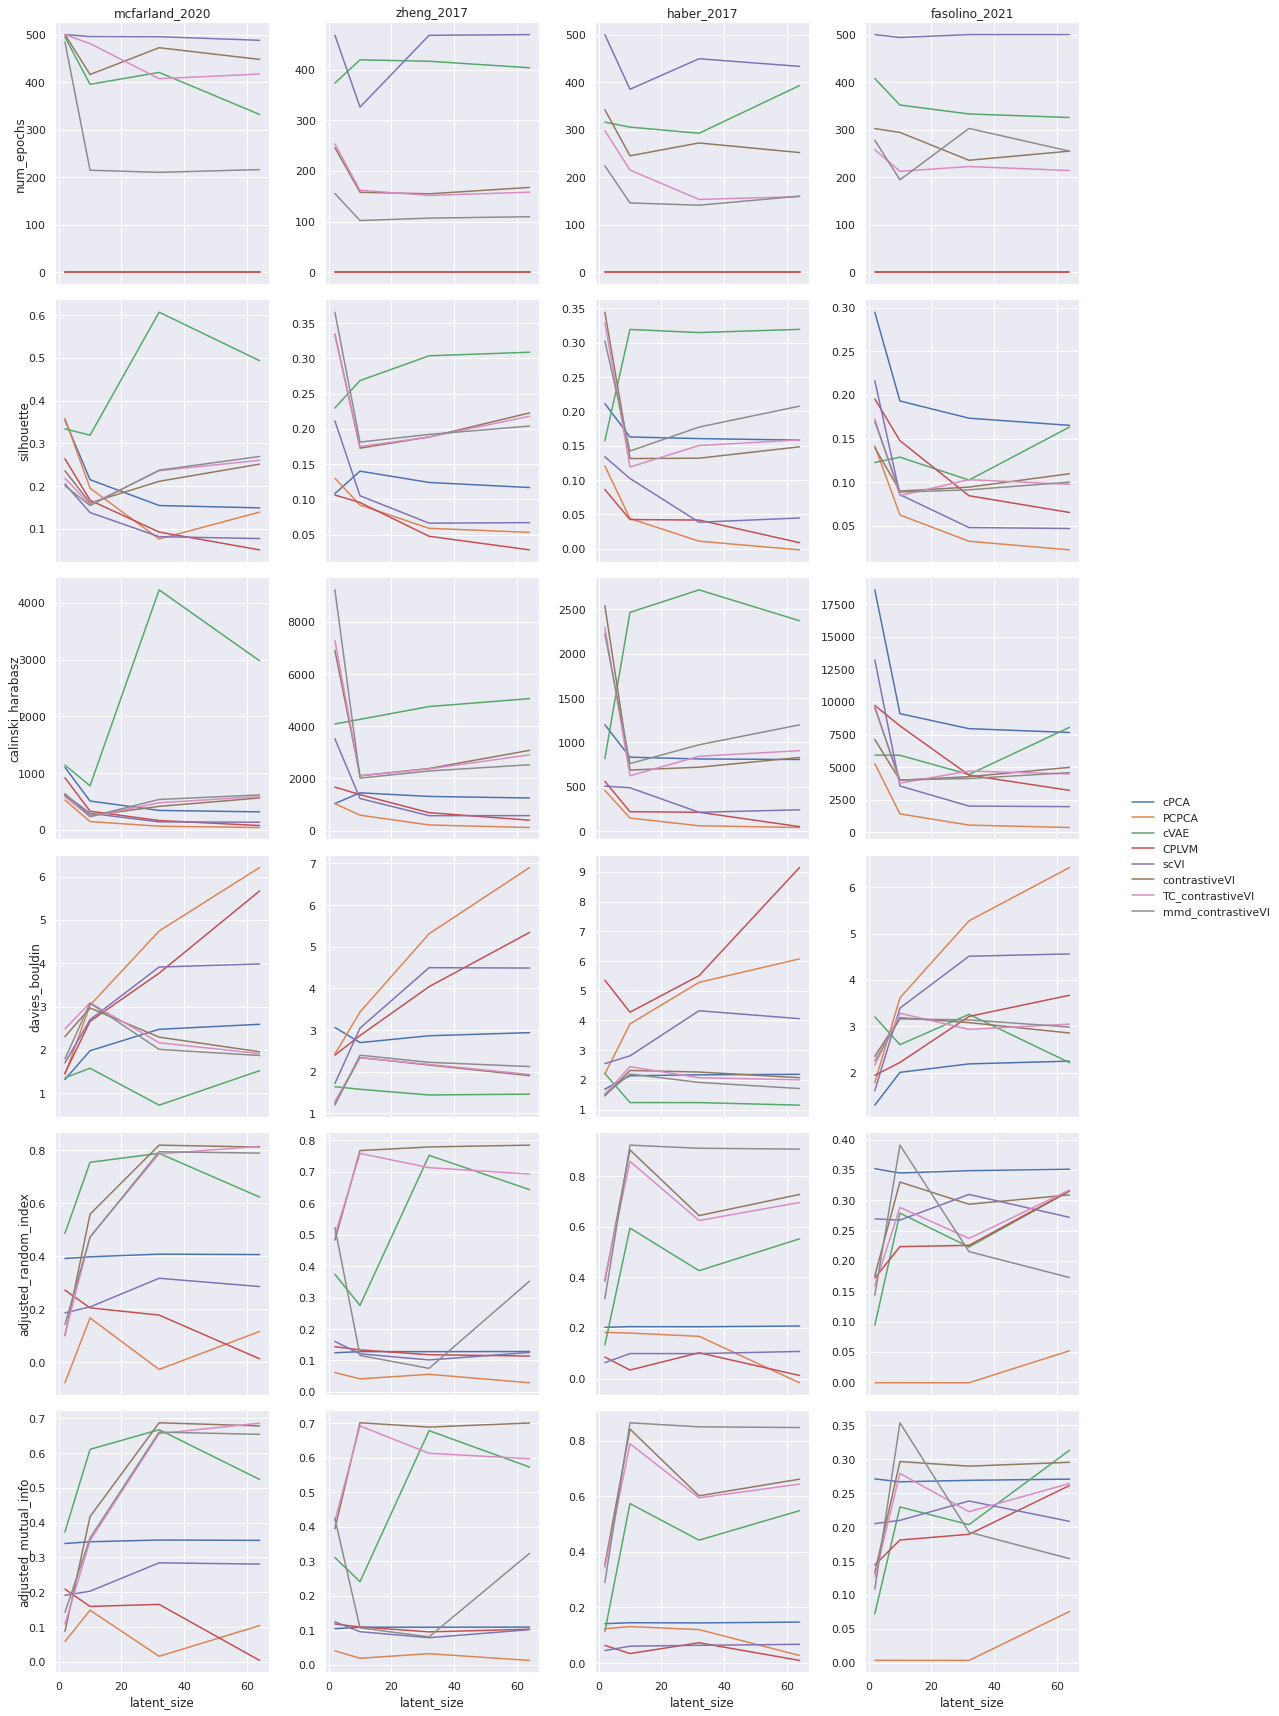

In [8]:
g = sns.FacetGrid(
    performance_df,
    col="dataset",
    row="metric",
    sharey=False,
    margin_titles=True,
    height=4,
)
g.map_dataframe(
    sns.lineplot,
    x="latent_size",
    y="value",
    hue="method",
    ci=None,
)
g.set_titles(
    col_template="{col_name}",
    row_template="",
)
for ax, metric in zip(g.axes[:,0], metrics):
    ax.set_ylabel(metric, fontsize=12, rotation=90, ha="center", va="center")
g.add_legend()

Latent size = 2


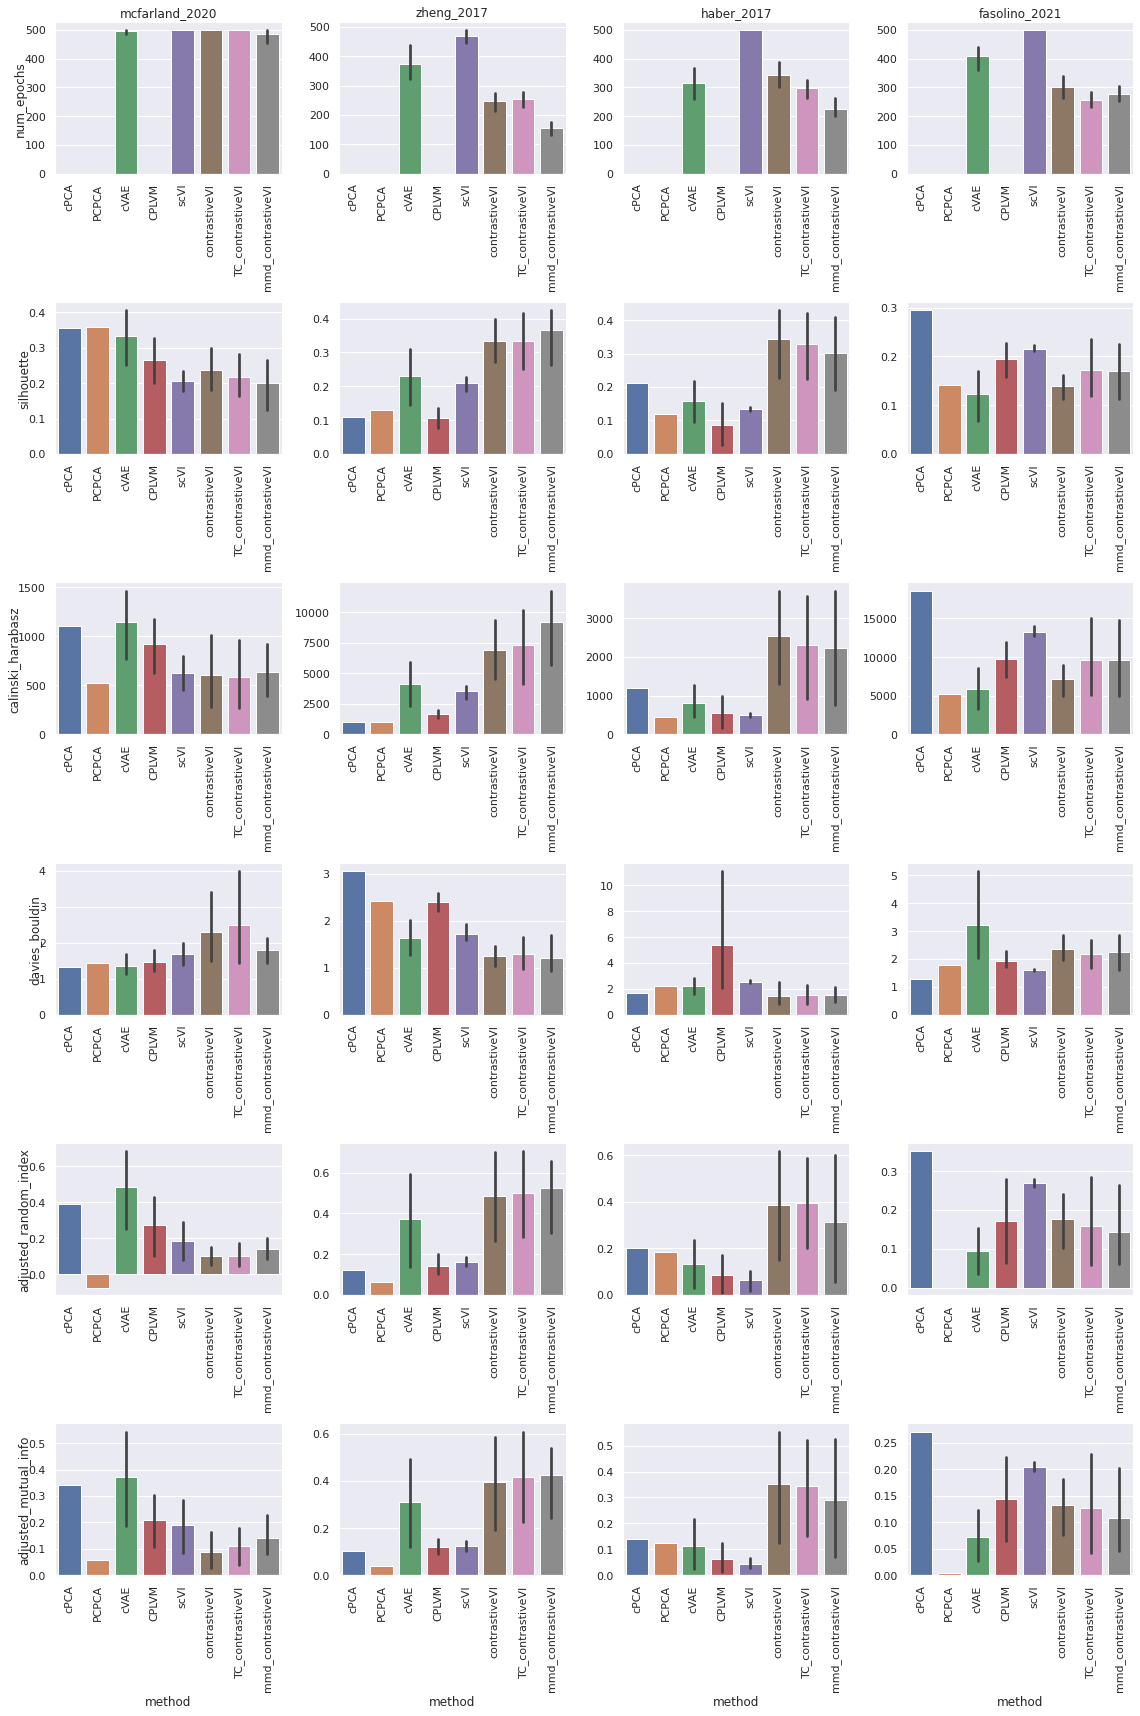

In [9]:
print("Latent size = 2")
g = sns.FacetGrid(
    performance_df[performance_df["latent_size"] == 2],
    col="dataset",
    row="metric",
    sharey=False,
    margin_titles=True,
    height=4,
)
g.map_dataframe(
    sns.barplot,
    x="method",
    y="value",
    hue="method",
    dodge=False,
    palette=sns.color_palette(),
)
g.set_titles(
    col_template="{col_name}",
    row_template="",
)
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        
for ax, metric in zip(g.axes[:,0], metrics):
    ax.set_ylabel(metric, fontsize=12, rotation=90, ha="center", va="center")
    
plt.tight_layout()

Latent size = 10


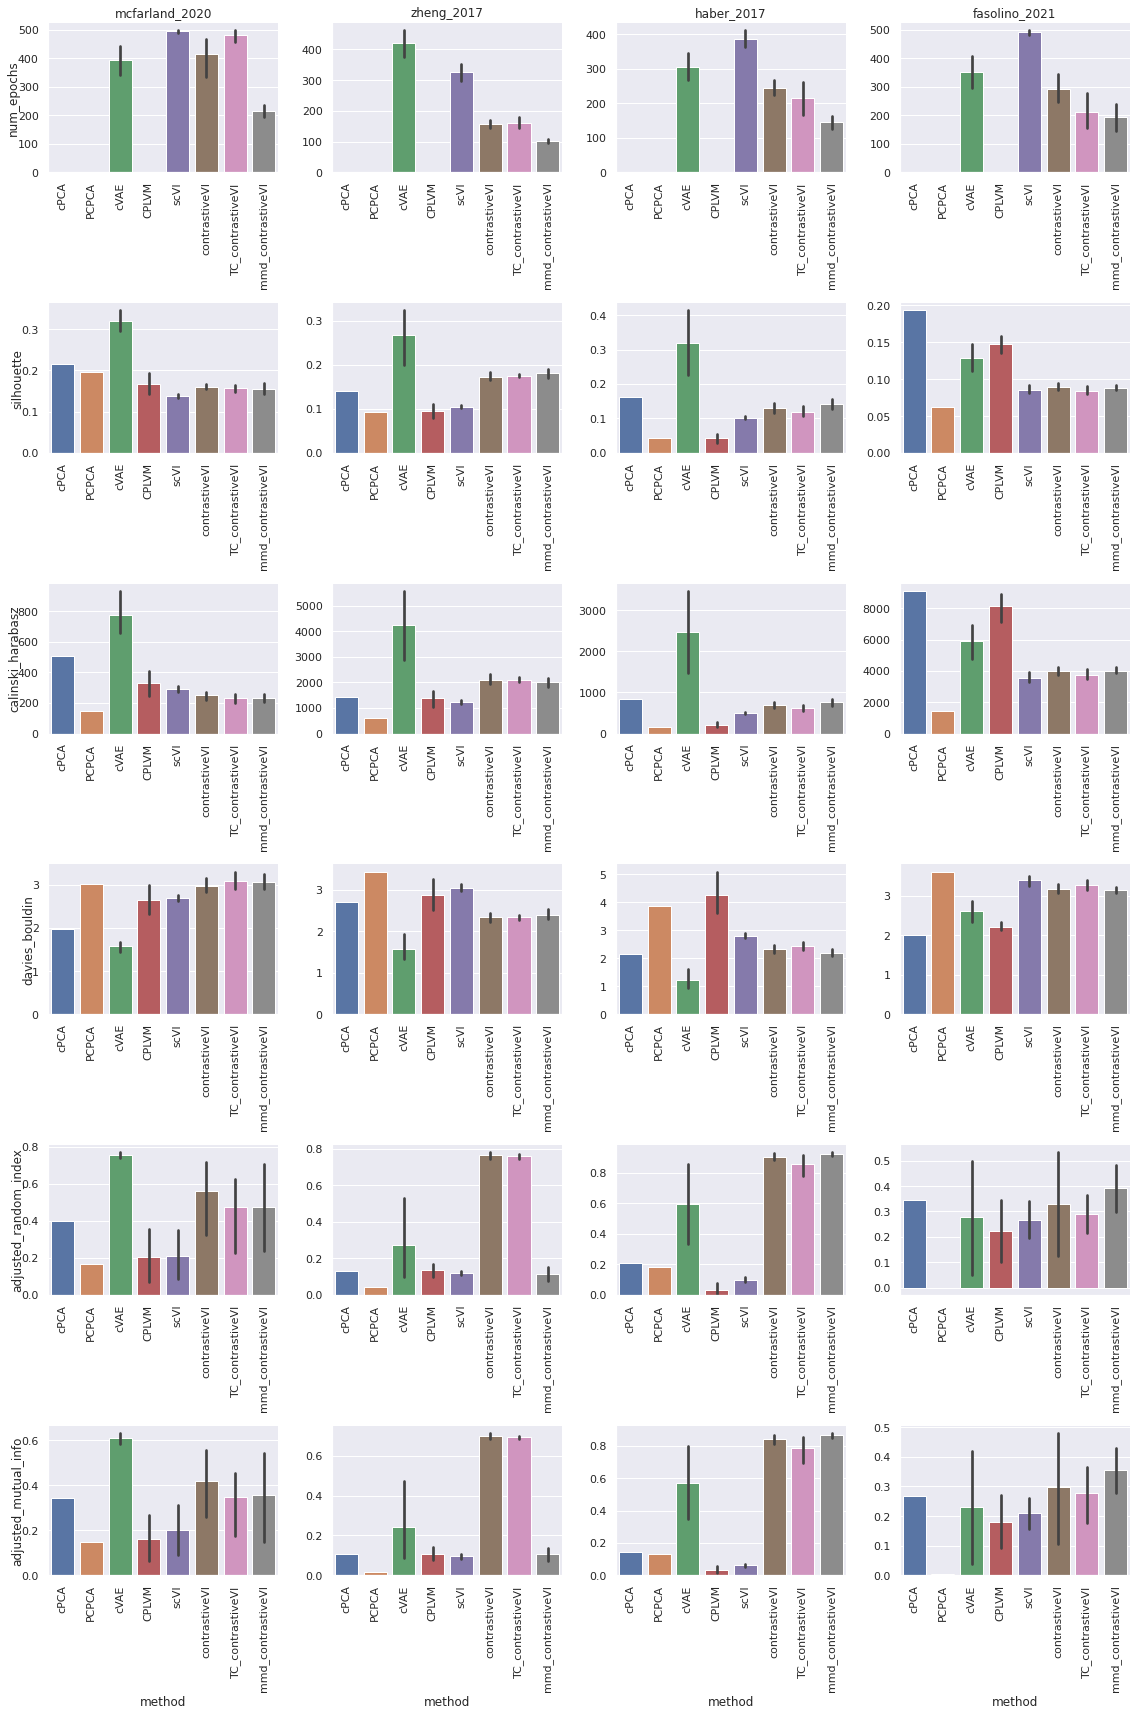

In [10]:
print("Latent size = 10")
g = sns.FacetGrid(
    performance_df[performance_df["latent_size"] == 10],
    col="dataset",
    row="metric",
    sharey=False,
    margin_titles=True,
    height=4,
)
g.map_dataframe(
    sns.barplot,
    x="method",
    y="value",
    hue="method",
    dodge=False,
    palette=sns.color_palette(),
)
g.set_titles(
    col_template="{col_name}",
    row_template="",
)
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        
for ax, metric in zip(g.axes[:,0], metrics):
    ax.set_ylabel(metric, fontsize=12, rotation=90, ha="center", va="center")
    
plt.tight_layout()

Latent size = 32


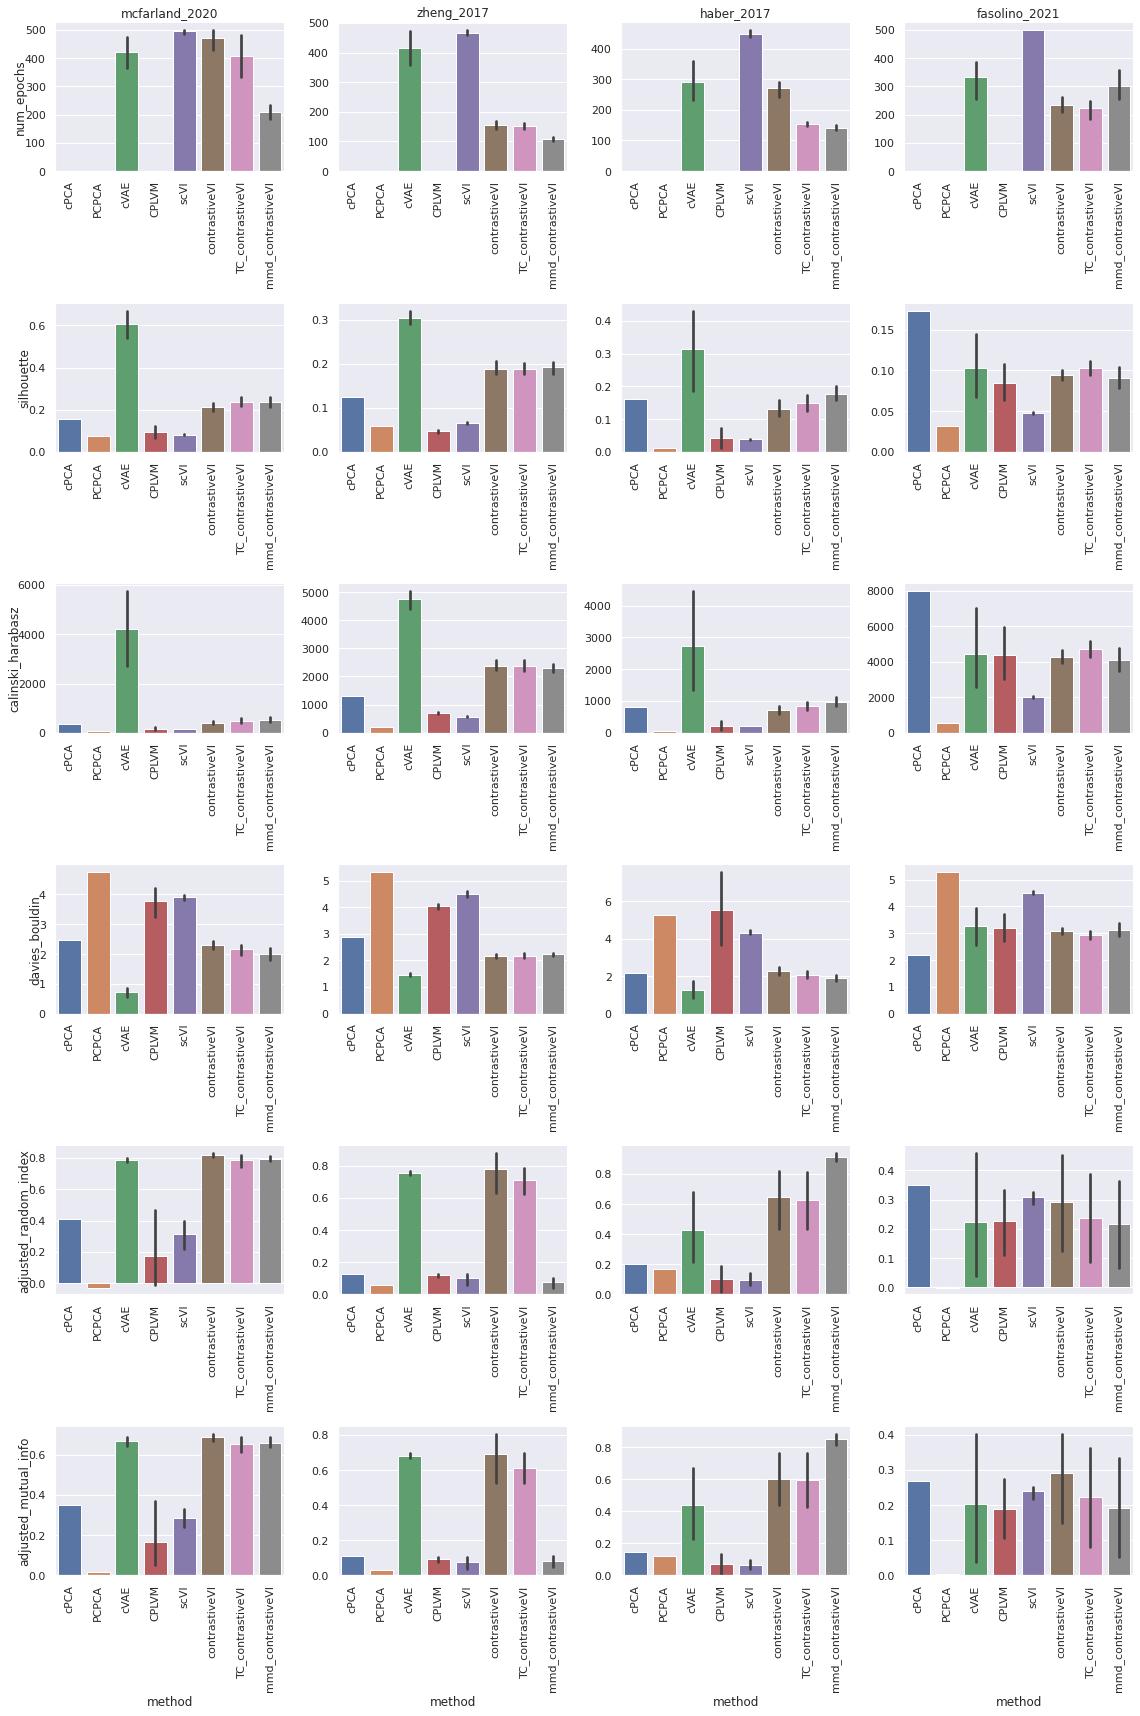

In [11]:
print("Latent size = 32")
g = sns.FacetGrid(
    performance_df[performance_df["latent_size"] == 32],
    col="dataset",
    row="metric",
    sharey=False,
    margin_titles=True,
    height=4,
)
g.map_dataframe(
    sns.barplot,
    x="method",
    y="value",
    hue="method",
    dodge=False,
    palette=sns.color_palette(),
)
g.set_titles(
    col_template="{col_name}",
    row_template="",
)
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        
for ax, metric in zip(g.axes[:,0], metrics):
    ax.set_ylabel(metric, fontsize=12, rotation=90, ha="center", va="center")
    
plt.tight_layout()

Latent size = 64


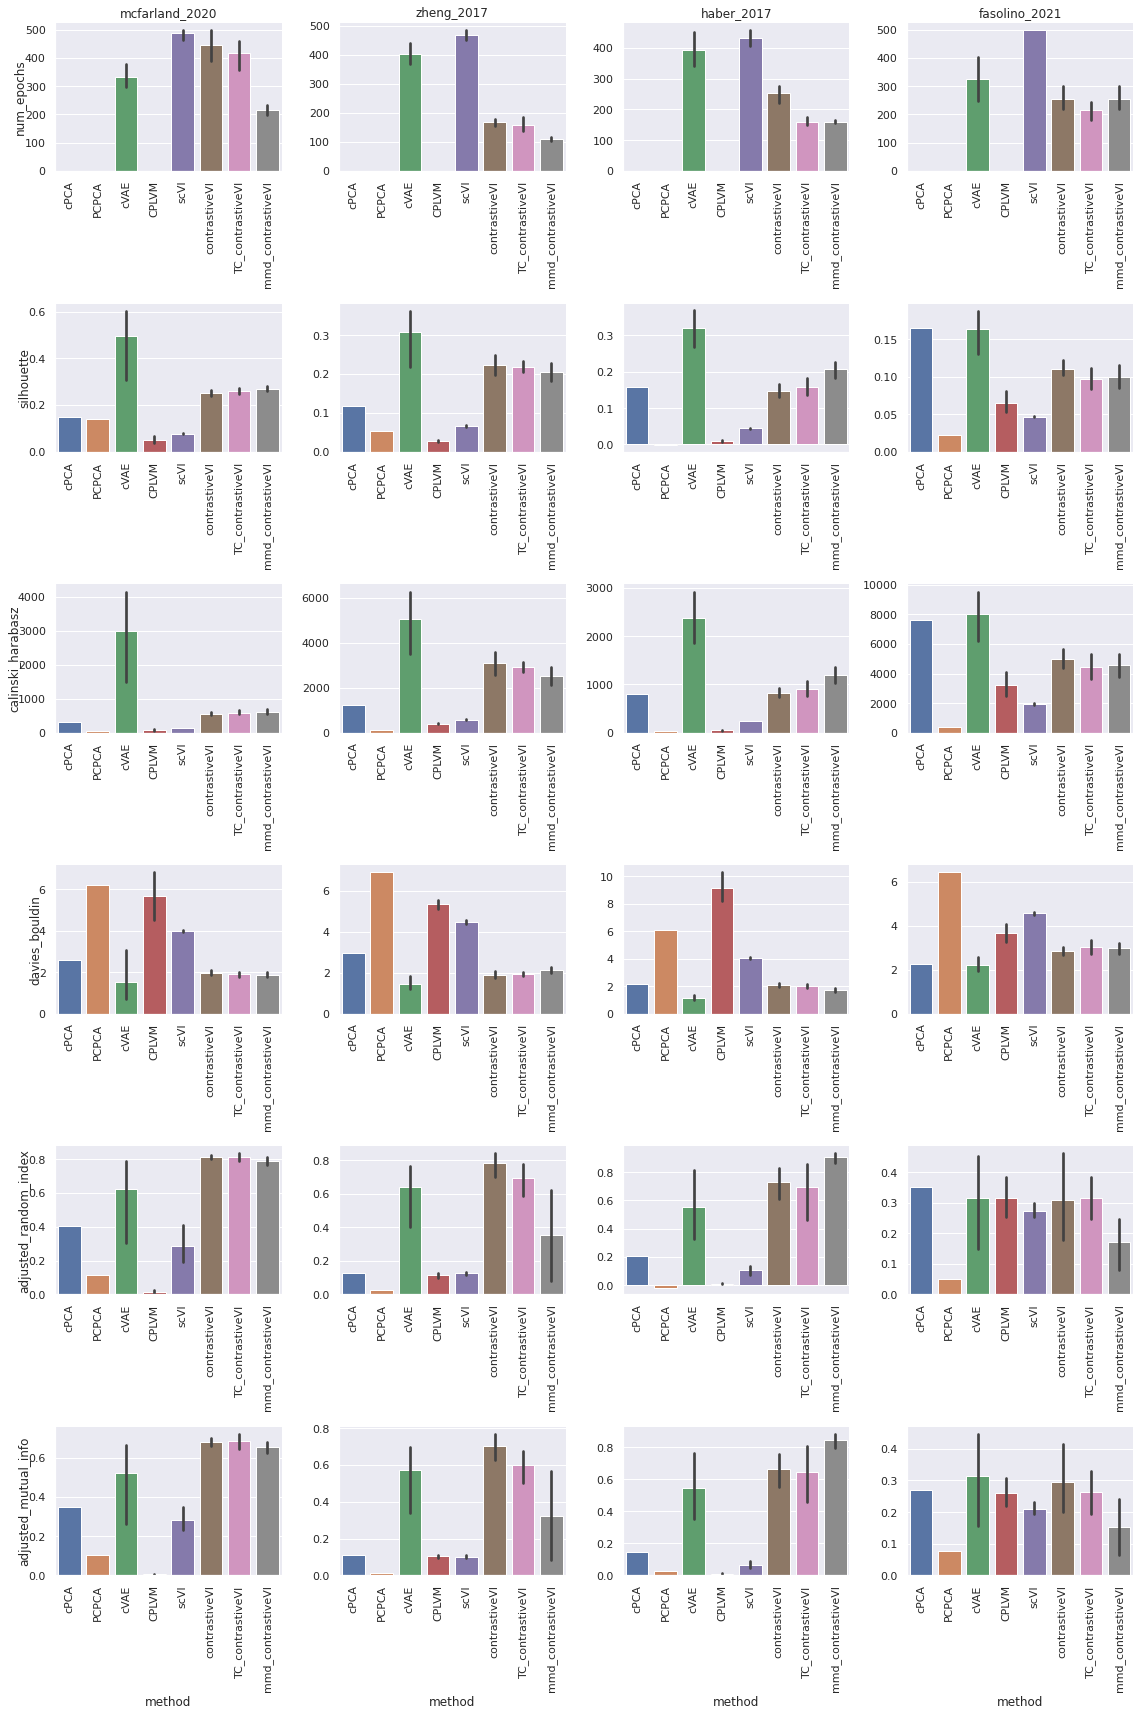

In [12]:
print("Latent size = 64")
g = sns.FacetGrid(
    performance_df[performance_df["latent_size"] == 64],
    col="dataset",
    row="metric",
    sharey=False,
    margin_titles=True,
    height=4,
)
g.map_dataframe(
    sns.barplot,
    x="method",
    y="value",
    hue="method",
    dodge=False,
    palette=sns.color_palette(),
)
g.set_titles(
    col_template="{col_name}",
    row_template="",
)
for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        
for ax, metric in zip(g.axes[:,0], metrics):
    ax.set_ylabel(metric, fontsize=12, rotation=90, ha="center", va="center")
    
plt.tight_layout()